In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
data = pd.read_csv('../input/train.csv')
data.shape

(88858, 10)

In [4]:
data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [5]:
data.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [6]:
data['Crop_Damage'].value_counts()/data['Crop_Damage'].value_counts().sum()

0    0.835468
1    0.138502
2    0.026030
Name: Crop_Damage, dtype: float64

In [7]:
data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [8]:
data.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
dtype: int64

In [9]:
data.astype({'Crop_Type' : 'category', 'Soil_Type' : 'category', 'Season' : 'category', 'Crop_Damage' : 'category', 'Pesticide_Use_Category':'category'}).dtypes

ID                           object
Estimated_Insects_Count       int64
Crop_Type                  category
Soil_Type                  category
Pesticide_Use_Category     category
Number_Doses_Week             int64
Number_Weeks_Used           float64
Number_Weeks_Quit             int64
Season                     category
Crop_Damage                category
dtype: object

In [10]:
def plotBarChart(x=None, y=None, data=None):
    viz_df = data.groupby([x, y])[y].agg([('total','size')]).reset_index()
    sns.barplot(x, y='total', hue=y, data=viz_df)
    plt.show()

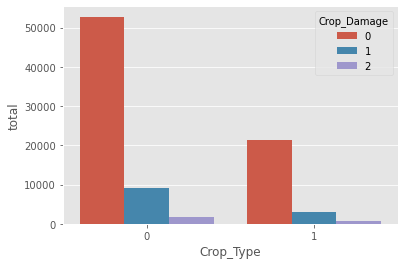

In [11]:
plotBarChart(x='Crop_Type', y='Crop_Damage', data=data)

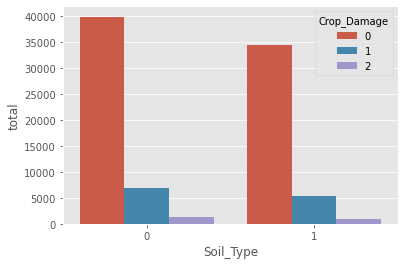

In [12]:
plotBarChart(x='Soil_Type', y='Crop_Damage', data=data)

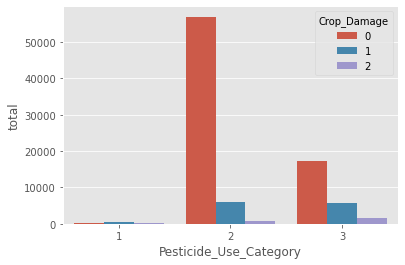

In [13]:
plotBarChart(x='Pesticide_Use_Category', y='Crop_Damage', data=data)

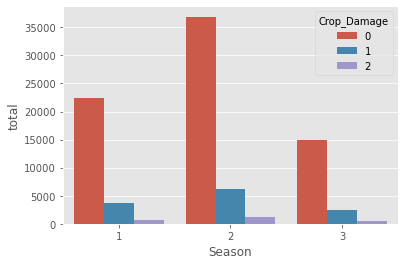

In [14]:
plotBarChart(x='Season', y='Crop_Damage', data=data)

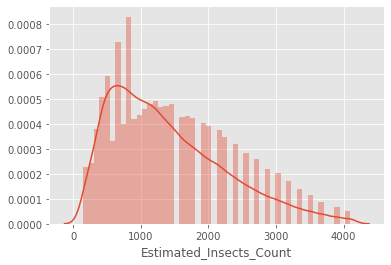

In [15]:
sns.distplot(a=data['Estimated_Insects_Count'])

In [16]:
data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

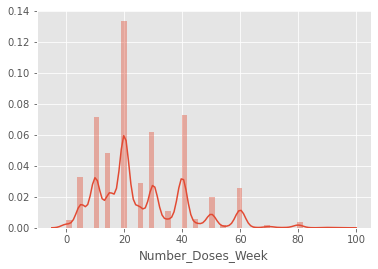

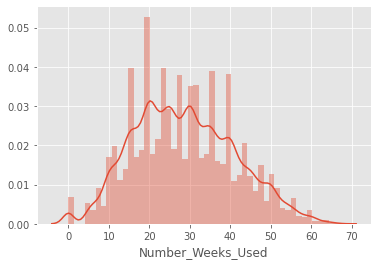

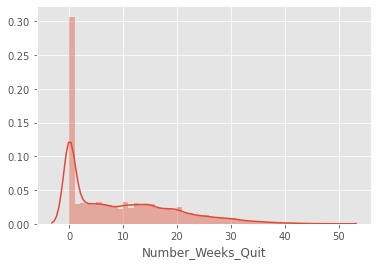

In [17]:
sns.distplot(a=data['Number_Doses_Week'])
plt.show()
sns.distplot(a=data['Number_Weeks_Used'])
plt.show()
sns.distplot(a=data['Number_Weeks_Quit'])
plt.show()

In [18]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [19]:
X = data.iloc[ :, 1 : -1]
y = data.iloc[ :, -1]

In [20]:
X.head()
y.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

In [21]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
std_scalar = StandardScaler()
min_max_scalar = MinMaxScaler()
onehot_encoder = OneHotEncoder(drop='first')
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
logreg_classifer = LogisticRegression(C=0.01)

In [24]:
data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [25]:
numerical_features = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']

categorical_features = ['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season']

In [26]:
numerical_transformer = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', std_scalar)])

In [27]:
categorical_transformer = Pipeline(steps=[
    ('onehot', onehot_encoder)])

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "numerical_transformation_pipeline",
            numerical_transformer,
            numerical_features,
        ),
        (
            "categorical_transformation_pipeline",
            categorical_transformer,
            categorical_features,
        ),
    ],
    verbose=True,
)

In [29]:
from sklearn import set_config
set_config(display='diagram')

In [30]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', logreg_classifer)])

In [31]:
rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformation_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Used',
                                                   'Number_Weeks_Quit']),
                                                 ('categorical_transformation_pipeline',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Crop_Type', 'Soil_Type',
                                                   'Pesticide_Use_Category',
                                                   'Season'])],
                                   verbose=True)),
                ('classifier', LogisticRegression(C=0.01))])

In [32]:
X = data.iloc[ :, 1: -1]
y = data.iloc[ :, -1]

In [33]:
rf.fit(X, y)

[ColumnTransformer]  (1 of 2) Processing numerical_transformation_pipeline, total=   0.1s
[ColumnTransformer]  (2 of 2) Processing categorical_transformation_pipeline, total=   0.3s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformation_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Used',
                                                   'Number_Weeks_Quit']),
                                                 ('categorical_transformation_pipeline',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Crop_Type', 'Soil_Type',
                                                   'Pesticide_Use_Category',
                                                   'Season'])],
                                   verbose=True)),
                ('classifier', LogisticRegression(C=0.01))])

In [34]:
rf.named_steps

{'preprocessor': ColumnTransformer(transformers=[('numerical_transformation_pipeline',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
                                  ['Estimated_Insects_Count',
                                   'Number_Doses_Week', 'Number_Weeks_Used',
                                   'Number_Weeks_Quit']),
                                 ('categorical_transformation_pipeline',
                                  Pipeline(steps=[('onehot',
                                                   OneHotEncoder(drop='first'))]),
                                  ['Crop_Type', 'Soil_Type',
                                   'Pesticide_Use_Category', 'Season'])],
                   verbose=True),
 'classifier': LogisticRegression(C=0.01)}

In [35]:
rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__numerical_transformation_pipeline', 'preprocessor__categorical_transformation_pipeline', 'preprocessor__numerical_transformation_pipeline__memory', 'preprocessor__numerical_transformation_pipeline__steps', 'preprocessor__numerical_transformation_pipeline__verbose', 'preprocessor__numerical_transformation_pipeline__imputer', 'preprocessor__numerical_transformation_pipeline__scaler', 'preprocessor__numerical_transformation_pipeline__imputer__add_indicator', 'preprocessor__numerical_transformation_pipeline__imputer__copy', 'preprocessor__numerical_transformation_pipeline__imputer__fill_value', 'preprocessor__numerical_transformation_pipeline__imputer__missing_values', 'preprocessor__numerical_transformation_pipeline__imputer__stra

In [37]:
data['ID_value'] = data['ID'].apply(lambda x: x.strip('F')).astype('int')

In [38]:
data = data.sort_values(['ID_value'])

In [39]:
data = data.reset_index(drop=True)

In [40]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,ID_value
0,F00000001,188,1,0,1,0,0.0,0,1,0,1
1,F00000003,209,1,0,1,0,0.0,0,2,1,3
2,F00000004,257,1,0,1,0,0.0,0,2,1,4
3,F00000005,257,1,1,1,0,0.0,0,2,1,5
4,F00000006,342,1,0,1,0,0.0,0,2,1,6


In [42]:
data['Soil_Type_Damage'] = data.sort_values(['ID_value']).groupby(['Soil_Type'])['Crop_Damage'].apply(lambda x: x.shift().rolling(5, min_periods=1).mean()).fillna(-999).values

In [49]:
data.sort_values(['ID_value']).groupby(['Soil_Type'])['Crop_Damage'].apply(lambda x: x.shift().rolling(5, min_periods=1).mean())

0             NaN
1        0.000000
2        0.500000
3             NaN
4        0.666667
           ...   
88853    0.200000
88854    0.200000
88855    0.200000
88856    0.000000
88857    0.000000
Name: Crop_Damage, Length: 88858, dtype: float64

In [46]:
data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,ID_value,Soil_Type_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0,1,-999.000000
1,F00000003,209,1,0,1,0,0.0,0,2,1,3,0.000000
2,F00000004,257,1,0,1,0,0.0,0,2,1,4,0.500000
3,F00000005,257,1,1,1,0,0.0,0,2,1,5,-999.000000
4,F00000006,342,1,0,1,0,0.0,0,2,1,6,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0,155935,0.200000
88854,F00155938,3516,1,0,2,10,20.0,38,1,0,155938,0.200000
88855,F00155939,3516,1,0,2,15,40.0,8,2,0,155939,0.200000
88856,F00155942,3702,1,0,2,10,25.0,18,3,0,155942,0.000000
